# Linear Regression using Batch Gradient Descent

## Libraries and Settings

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
assert sklearn.__version__ >= "0.20"

# To make this notebook's output stable across runs
np.random.seed(42)

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


# Linear regression Do-It-Yourself

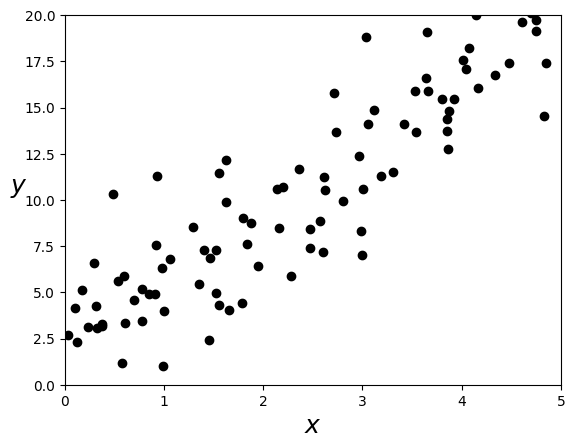

In [2]:
X = 5 * np.random.rand(100, 1) 
y = 1 + 4 * X + 3*np.random.randn(100, 1)

plt.scatter(X, y, color = 'black')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

Dieser Code generiert zufällige Datenpunkte und visualisiert sie in einem Streudiagramm. Hier ist eine Schritt-für-Schritt-Erklärung:

1. **Generierung der Datenpunkte:**
   ```python
   X = 5 * np.random.rand(100, 1)
   ```
   - [`np.random.rand(100, 1)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A73%2C%22character%22%3A13%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") erzeugt ein Array mit 100 zufälligen Werten zwischen 0 und 1.
   - Diese Werte werden mit 5 multipliziert, um sie in den Bereich von 0 bis 5 zu skalieren.

2. **Erzeugung der Zielwerte:**
   ```python
   y = 1 + 4 * X + 3 * np.random.randn(100, 1)
   ```
   - [`1 + 4 * X`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A74%2C%22character%22%3A9%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") definiert eine lineare Beziehung zwischen [`X`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A0%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A458%2C%22character%22%3A37%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A533%2C%22character%22%3A20%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A73%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A267%2C%22character%22%3A35%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLogistic_Regression%2Flogistic_regression_apartment_data.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A241%2C%22character%22%3A34%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLogistic_Regression%2Flogistic_regression_iris_data.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A157%2C%22character%22%3A5%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") und [`y`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A531%2C%22character%22%3A12%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A449%2C%22character%22%3A14%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1187%2C%22character%22%3A14%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1378%2C%22character%22%3A9%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1520%2C%22character%22%3A12%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1606%2C%22character%22%3A9%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1696%2C%22character%22%3A9%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") mit einem Achsenabschnitt von 1 und einer Steigung von 4.
   - `3 * np.random.randn(100, 1)` fügt Rauschen (zufällige Normalverteilung) zu den Zielwerten hinzu, um die Daten realistischer zu machen.

3. **Visualisierung der Daten:**
   ```python
   plt.scatter(X, y, color='black')
   plt.xlabel("$x$", fontsize=18)
   plt.ylabel("$y$", rotation=0, fontsize=18)
   plt.axis([0, 5, 0, 20])
   plt.show()
   ```
   - [`plt.scatter(X, y, color='black')`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A0%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") erstellt ein Streudiagramm der Datenpunkte in Schwarz.
   - [`plt.xlabel("$x$", fontsize=18)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A0%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") und [`plt.ylabel("$y$", rotation=0, fontsize=18)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A0%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") setzen die Beschriftungen der x- und y-Achse mit einer Schriftgröße von 18.
   - [`plt.axis([0, 5, 0, 20])`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A274%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A79%2C%22character%22%3A5%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") setzt die Grenzen der x-Achse auf 0 bis 5 und der y-Achse auf 0 bis 20.
   - [`plt.show()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A468%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A538%2C%22character%22%3A8%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_apartment_prices.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1202%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1382%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1524%2C%22character%22%3A8%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1610%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A1700%2C%22character%22%3A5%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_gradient_descent.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A80%2C%22character%22%3A5%7D%7D%5D%2C%22396e823c-31a5-420f-ac2a-ced55f72c0f7%22%5D "Go to definition") zeigt das Diagramm an.

Dieser Code befindet sich in der Datei 

linear_regression_gradient_descent.ipynb

.

Hier sind drei weitere Code-Beispiele, die verschiedene Aspekte der Datenanalyse und -visualisierung zeigen:

### Beispiel 1: Histogramm der Verteilung der Zielwerte


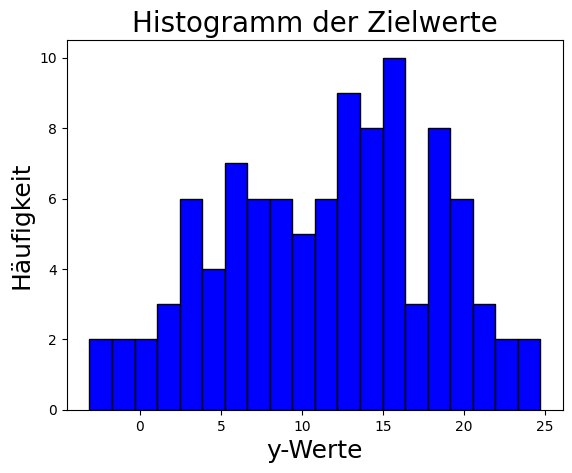

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Daten generieren
X = 5 * np.random.rand(100, 1)
y = 1 + 4 * X + 3 * np.random.randn(100, 1)

# Histogramm der Zielwerte
plt.hist(y, bins=20, color='blue', edgecolor='black')
plt.xlabel("y-Werte", fontsize=18)
plt.ylabel("Häufigkeit", fontsize=18)
plt.title("Histogramm der Zielwerte", fontsize=20)
plt.show()



### Beispiel 2: Boxplot der Zielwerte


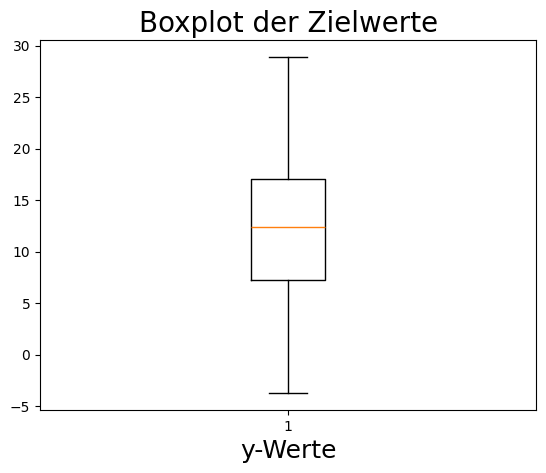

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Daten generieren
X = 5 * np.random.rand(100, 1)
y = 1 + 4 * X + 3 * np.random.randn(100, 1)

# Boxplot der Zielwerte
plt.boxplot(y)
plt.xlabel("y-Werte", fontsize=18)
plt.title("Boxplot der Zielwerte", fontsize=20)
plt.show()



### Beispiel 3: Lineare Regression und Plot der Regressionslinie


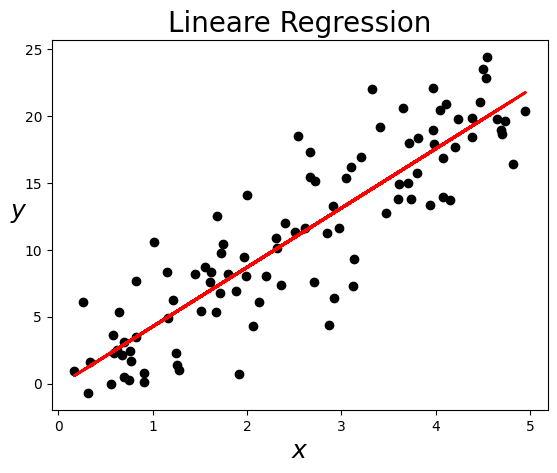

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Daten generieren
X = 5 * np.random.rand(100, 1)
y = 1 + 4 * X + 3 * np.random.randn(100, 1)

# Lineare Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Streudiagramm und Regressionslinie
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Lineare Regression", fontsize=20)
plt.show()



Diese Beispiele zeigen verschiedene Möglichkeiten, wie man Daten visualisieren und analysieren kann.

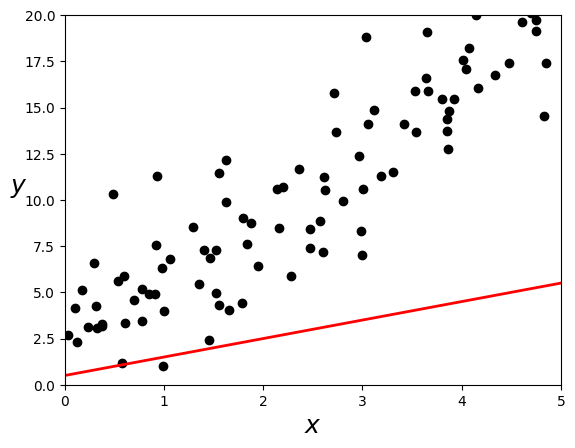

In [3]:
# Sample data
x_new = np.linspace(0, 5, 100)

# Make a guess for theta_0 and theta_1
theta_0 = 0.5 # Please make a better guess for theta_0
theta_1 = 1.0 # Please make a better guess for theta_1

y_hyp =  + theta_0 + theta_1 * x_new

# Plot data an guess of theta_1 & theta_0
plt.scatter(X, y, color = 'black' )
plt.plot(x_new, y_hyp, color = 'red', lw = 2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()


# Search for optimal values of theta_0 und theta_1 using batch gradient descent

In [4]:
# Learning rate
eta = 0.1

# Number of iterations
n_iterations = 1000

# Number of samples
N = 100

# Random initialization of theta_1 and theta_0
theta_1 = np.random.randn(1)
theta_0 = np.random.randn(1)

# Lists to store the values of theta_1 and theta_0 during the iterations
cum_theta1=[]
cum_theta0=[]

# Gradient Descent
for iteration in range(n_iterations):
    cum_theta0.append(theta_0)
    cum_theta1.append(theta_1)
    
    # Compute the gradients
    gradient_theta_0 = 1/N * np.sum((theta_1*X + theta_0 - y))
    gradient_theta_1 = 1/N * np.sum((theta_1*X + theta_0 - y)*X)

    # Update theta_0 and theta_1
    theta_0 = theta_0 - eta * gradient_theta_0
    theta_1 = theta_1 - eta * gradient_theta_1

# Plot the values of theta_1 and theta_0
print("theta_0: ", theta_0)
print("theta_1: ", theta_1)

theta_0:  [1.64528847]
theta_1:  [3.72413606]


## Plot the values of theta_1 and theta_0 for each iteration

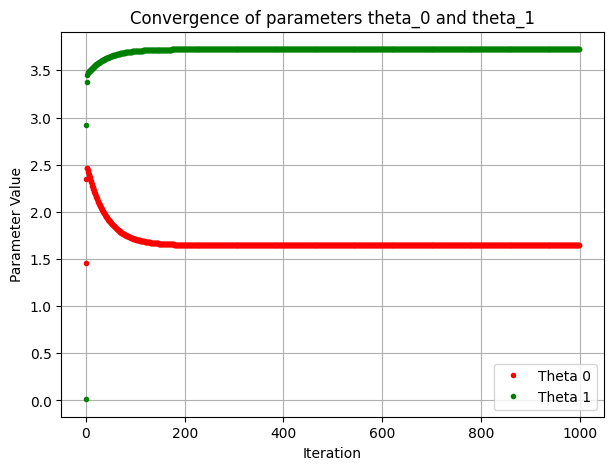

In [5]:
# Plot the values of theta_1 and theta_0
plt.figure(figsize=(7, 5))
plt.plot(cum_theta0, 'r.', label='Theta 0')
plt.plot(cum_theta1, 'g.', label='Theta 1')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Convergence of parameters theta_0 and theta_1')
plt.legend()
plt.grid()
plt.show()

# Calculate values for theta_0 und theta_1 using linear regression

In [6]:
# Calculate values for theta_0 und theta_1 using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print values for theta_0 und theta_1
print("theta_0: ", lin_reg.intercept_)
print("theta_1: ", lin_reg.coef_)

theta_0:  [1.64528847]
theta_1:  [[3.72413606]]


## Performing a prediction using a linear regression model

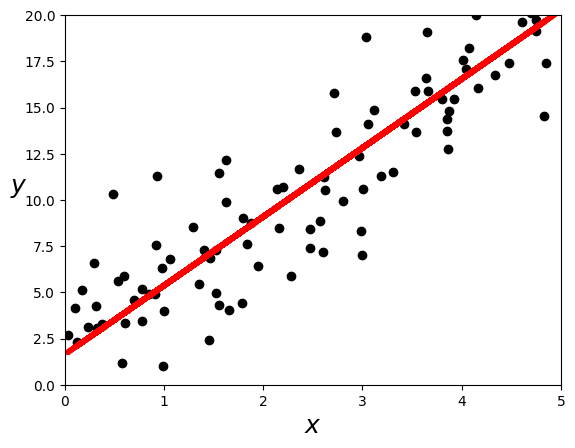

In [7]:
# Performing a prediction using a linear regression model
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_

# Plot the data and the prediction
plt.scatter(X, y, color = 'black' )
plt.plot(X, ypred_exact, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-28 19:38:38
Python Version: 3.11.10
-----------------------------------
